In [57]:
import csv
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

csvs = glob.glob('C:\\Users\\Brian\\Documents\\Career\\Website\\personalSite\\projects\\redditEmojiAnalysis\\analysis\\data\\*.csv')
  
file = csvs[0]
df = pd.read_csv(file)
print(df['subreddit'][0])
del df['subreddit']

df['binnedScore'] = pd.cut(df['score'], bins=[float("-inf"), .9, 1.1, float("inf")], labels = [-1, 0, 1])
df['binnedEmojiCount'] = pd.cut(df['emojiCount'], bins=[-1, .9, 1.1, float("inf")], labels = [0, 1, 2])
df['binnedprofanityCount'] = pd.cut(df['profanityCount'], bins=[-1, .9, 1.1, float("inf")], labels = [0, 1, 2])
df['binnedWordCount'] = pd.cut(df['wordCount'], bins=[0, 5, float("inf")], labels = [0, 2])
print(df.head())
# for idx, row in df.iterrows():  
#     if  df.loc[idx,'score'] > 1:
#         df.loc[idx,'score'] = 2
#     elif df.loc[idx,'score'] < 1:
#         df.loc[idx,'score'] = 0
        
#     if  df.loc[idx,'emojiCount'] > 1:
#         df.loc[idx,'emojiCount'] = 2
        
#     if  df.loc[idx,'profanityCount'] > 1:
#         df.loc[idx,'profanityCount'] = 2
        
#     if  df.loc[idx,'wordCount'] > 50:
#         df.loc[idx,'wordCount'] = 1
#     else:
#         df.loc[idx,'wordCount'] = 0


print(df.describe())

x = df[['binnedEmojiCount', 'binnedprofanityCount', 'binnedWordCount']]

y = df['binnedScore']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(xTrain, yTrain)

#Predict Output 
predicted = model.predict(xTest)
predictedProb = model.predict_proba(xTest)
print(predictedProb)
xTest['predicted'] = predicted
xTest['binnedScore'] = yTest

print(xTest)
score = accuracy_score(yTest, predicted)
print(score)

ModuleNotFoundError: No module named 'seaborn'

In [60]:
import csv
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

csvs = glob.glob('C:\\Users\\Brian\\Documents\\Career\\Website\\personalSite\\projects\\redditEmojiAnalysis\\analysis\\data\\*.csv')
  
file = csvs[0]
df = pd.read_csv(file)
print(df['subreddit'][0])
del df['subreddit']

dataisbeautiful


In [52]:
df['binnedScore'] = pd.cut(df['score'], bins=[float("-inf"), .9, 1.1, float("inf")], labels = [-1, 0, 1])
df['binnedEmojiCount'] = pd.cut(df['emojiCount'], bins=[-1, .9, 1.1, float("inf")], labels = [0, 1, 2])
df['binnedProfanityCount'] = pd.cut(df['profanityCount'], bins=[-1, .9, 1.1, float("inf")], labels = [0, 1, 2])
df['binnedWordCount'] = pd.cut(df['wordCount'], bins=[0, 5, float("inf")], labels = [0, 2])
df['proportionWordsEmojis'] = df['emojiCount'] / df['wordCount']
df['proportionWordsProfanity'] = df['profanityCount'] / df['wordCount']
print(df.head())

print(df.describe())

   score  emojiCount  profanityCount  wordCount binnedScore binnedEmojiCount  \
0      1           1               0         19           0                1   
1     14           0               0         13           1                0   
2      1           0               1         24           0                0   
3      1           2               0         12           0                2   
4      3           0               1         33           1                0   

  binnedprofanityCount binnedWordCount binnedProfanityCount  \
0                    0               2                    0   
1                    0               2                    0   
2                    1               2                    1   
3                    0               2                    0   
4                    1               2                    1   

   proportionWordsProfanity  proportionWordsEmojis  
0                  0.000000               0.052632  
1                  0.000000       

In [39]:
# The most common comment score is 1. When guessing if the comment is positive, negative, or neutral (score = 1) a score of 1 is our best guess.
propScore1 = len(df[(df['score'] == 1)])/len(df)

print('Proportion of rows in dataframe in which score = 1 : ', propScore1)
# Any accuracy less than this proportion will be worse than simply guessing 1.
# We must achieve an accuracy higher than this proportion for the NB model to better than the control model.

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

Proportion of rows in dataframe in which score = 1 :  0.456


,score,emojiCount,profanityCount,wordCount,proportionWordsProfanity,proportionWordsEmojis
score,1,0.00393542,-0.0264057,-0.00288627,-0.0216129,-0.00620112
emojiCount,0.00393542,1,-0.021254,0.629266,-0.0121071,0.0487659
profanityCount,-0.0264057,-0.021254,1,0.246758,0.417784,-0.071331
wordCount,-0.00288627,0.629266,0.246758,1,-0.0748868,-0.0202982
proportionWordsProfanity,-0.0216129,-0.0121071,0.417784,-0.0748868,1,-0.0381119
proportionWordsEmojis,-0.00620112,0.0487659,-0.071331,-0.0202982,-0.0381119,1


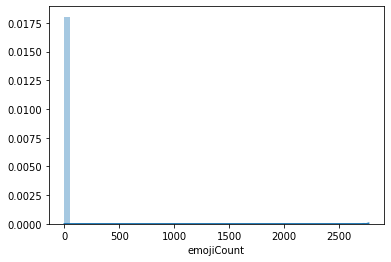

In [64]:
sns.distplot(df['emojiCount']);

In [55]:


x = df[['binnedEmojiCount', 'binnedProfanityCount', 'binnedWordCount']]
y = df['binnedScore']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(xTrain, yTrain)

#Predict Output 
predicted = model.predict(xTest)
predictedProb = model.predict_proba(xTest)
print(predictedProb)
xTest['predicted'] = predicted
xTest['binnedScore'] = yTest

print(xTest)
score = accuracy_score(yTest, predicted)
print(score)

[[0.08964966 0.45334242 0.45700792]
 [0.08904094 0.50220496 0.4087541 ]
 [0.10627466 0.46561165 0.42811369]
 ...
 [0.08752906 0.55062645 0.36184448]
 [0.08964966 0.45334242 0.45700792]
 [0.08904094 0.50220496 0.4087541 ]]
     binnedEmojiCount binnedProfanityCount binnedWordCount  predicted  \
471                 0                    0               2          1   
9                   1                    0               2          0   
1499                1                    1               2          0   
54                  2                    0               0          0   
1411                0                    1               2          1   
1157                1                    0               2          0   
737                 0                    1               2          1   
175                 0                    1               2          1   
260                 0                    0               0          0   
1417                1                    0      

C:\Users\Brian\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Brian\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
